## Module 3, Lsn 3 ##

## Selecting Data based on content ##

Sometimes you only want parts of your dataset, so let's practice picking and choosing the data we want to work with.

Let's start with the surveys data we used last lesson, and look at the first 10 lines to refresh ourselves on what is in it.



In [1]:
# Setup
import pandas as pd

surveys_df = pd.read_csv("surveys.csv")

surveys_df.head(10)


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


### Indexing and Slicing ##

We often want to work with subsets of a DataFrame object. There are different ways to accomplish this including: using labels (column headings), numeric ranges, or specific x,y index locations.

___

### Select data using Column Headings ##

We use square brackets [] to select a subset of a Python object. For example, we can select all data from a column named species_id from the surveys_df DataFrame by name. There are two ways to do this:

In [2]:
# Example 1
# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id']

# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

We can also create a new object, called _surveys_species_ that contains only the data within the species_id column as follows:

In [3]:
# Example 2
# Creates an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']

We can pass a list of column names too, as an index to select columns in that order. This is useful when we need to reorganize our data.

NOTE: If a column name is not contained in the DataFrame, an exception (error) will be raised.

In [4]:
# Example 3
# Select the species and plot columns from the DataFrame
surveys_df[['species_id', 'plot_id']]

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


In [5]:
# Example 4
# What happens when you flip the order?
surveys_df[['plot_id', 'species_id']]

,plot_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM
...,...,...
35544,15,AH
35545,15,AH
35546,10,RM
35547,7,DO


Notice that the sequence of columns changed to reflect your input.

In [6]:
# Example 5
# What happens if you ask for a column that doesn't exist?
surveys_df['speciess']

KeyError: 'speciess'

Python tells us what type of error it is in the traceback, at the bottom it says KeyError: 'speciess' which means that speciess is not a valid column name (nor a valid key in the related Python data type dictionary).

We now have a new DataFrame, called _surveys_df_, containing just the columns we asked for, and in the sequence we entered.  We can now manipulate it as needed, to include filling in any missing numbers, saving to a file or merging with another data set.

---------

## Extracting value based subset ##

In the previous example, we chose columns to pull.  What happens if we want specific data?  We will use 'logical operators' to pick/choose that data.

First, remember how Python uses indexes, and that they start with 0.  There are many software packages available, and they all use indexing of some sort.  A *MAJOR* difference/parameter that you need to be aware of, for each package, is how they index.  Python uses 0-based indexing, which means the first element in an object is located at position 0.

-------

Slicing using the [] operator selects a set of rows and/or columns from a DataFrame. To slice out a set of rows, you use the following syntax: data[start:stop]. When slicing in pandas the start bound is included in the output. The stop bound is one step BEYOND the row you want to select. So if you want to select rows 0, 1 and 2 your code would look like this:


In [7]:
# Example 6
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


The stop bound in Python is different from what you might be used to in languages like Matlab and R.

In [8]:
# Example 7
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
surveys_df[:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [9]:
# Example 8
# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


We can also reassign values within subsets of our DataFrame.

But before we do that, let’s look at the difference between the concept of copying objects and the concept of referencing objects in Python.

-----
### Copying Objects vs Referencing Objects in Python ###

The concept of creating a new variable or referencing an object with two different names is a uniquely computer science situation.  In some situations, you might want two variables to reference the same content/memory space.  This is when you would choose to 'reference' an object - you can change it in one location and then access it with another variable.

The more typical way is to create a new variable - to do this, you will need to 'copy'.  Here are some examples.


In [10]:
# Example 9
# Using the 'copy() method'
true_copy_surveys_df = surveys_df.copy()

# Using the '=' operator
ref_surveys_df = surveys_df

You might think that the code _ref_surveys_df = surveys_df_ creates a fresh distinct copy of the _surveys_df_ DataFrame object. However, using the = operator in the simple statement y = x does not create a copy of our DataFrame. Instead, _y = x_ creates a new variable y that references the same object that x refers to. To state this another way, there is only one object (the DataFrame), and both x and y refer to it.

In contrast, the copy() method for a DataFrame creates a true copy of the DataFrame.

Let’s look at what happens when we reassign the values within a subset of the DataFrame that references another DataFrame object:

In [11]:
# Example 10
# Assign the value `0` to the first three rows of data in the DataFrame
ref_surveys_df[0:3] = 0

Let’s try the following code:


In [12]:
# Example 11
# ref_surveys_df was created using the '=' operator
ref_surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [ ]:
# Example 12
# surveys_df is the original dataframe
surveys_df.head()

What is the difference between these two dataframes?

When we assigned the first 3 columns the value of 0 using the _ref_surveys_df DataFrame_, the _surveys_df_ DataFrame is modified too. Remember we created the reference ref_surveys_df object above when we did _ref_surveys_df = surveys_df_. Remember _surveys_df_ and _ref_surveys_df_ refer to the same exact DataFrame object. If either one changes the object, the other will see the same changes to the reference object.

---
To review and recap:

Copy uses the dataframe’s copy() method

In [13]:
# Example 13
true_copy_surveys_df = surveys_df.copy()

A Reference is created using the = operator

In [14]:
# Example 14
ref_surveys_df = surveys_df

Okay, that’s enough of that. Let’s create a brand new clean dataframe from the original data CSV file.

In [15]:
# Example 15
surveys_df = pd.read_csv("surveys.csv")

---
## Slicing Subsets of Rows and Columns in Python ##
We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

<ul>
<li>loc is primarily label based indexing. Integers may be used but they are interpreted as a label. </li>
<li>iloc is primarily integer based indexing</li>
</ul>

To select a subset of rows and columns from our DataFrame, we can use the iloc method. For example, we can select month, day and year (columns 2, 3 and 4 if we start counting at 1), like this and the output looks like: 

In [16]:
# Example 16
# iloc[row slicing, column slicing]
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you ask for 0:3, you are actually telling Python to start at index 0 and select rows 0, 1, 2 **up to but not including 3**.

Let’s explore some other ways to index and select subsets of data:

In [17]:
# Example 17
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [18]:
# Example 18
# What does this do?
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [19]:
# Example 19
# What happens when you type the code below?
surveys_df.loc[[0, 10, 35549], :]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([35549], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

NOTE: Labels must be found in the DataFrame or you will get a KeyError.

Indexing by labels loc differs from indexing by integers iloc. With loc, both the start bound and the stop bound are inclusive. When using loc, integers can be used, but the integers refer to the index label and not the position. For example, using loc and select 1:4 will get a different result than using iloc to select rows 1:4.

We can also select a specific data value using a row and column location within the DataFrame and iloc indexing:

Syntax for iloc indexing to finding a specific data element

_dat.iloc[row, column_

In [20]:
# Example 20
surveys_df.iloc[2, 6]

'F'

## Exercise 1 Answers

In [21]:
#execute surveys_df[0:1]
#prints the first row of the dataframe
surveys_df[0:1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [22]:
#execute surveys_df[:4]
#prints the first four row of the dataframe
surveys_df[:4]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [23]:
#execute surveys_df[:-1]
#prints all the rows in the dataframe except the last one
surveys_df[:-1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [24]:
#execute surveys_df.iloc[0:4, 1:4] 
#prints the first four rows' columns 1,2 and 3 of the dataframe
surveys_df.iloc[0:4, 1:4] 

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


In [25]:
#execute surveys_df.loc[0:4, 1:4]
#results in an error as the second argument expects labels or list of booleans the same size as the number of colums
surveys_df.loc[0:4, 1:4] 

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

The two commands, dataframe.iloc[] and dataframe.loc() are different in that iloc works with indexs and uses the square
brackets notation while loc() mainly works with labels and uses the brackets notation.
dataframe.iloc[] accepts either one or two arguments for rows and columns respectively that are numerical.
dataframe.loc() also accepts two arguments, the first being indexs for rows and the second being used to select
columns either as a string for a single column, list of columns for 1 or more columns or a list of booleans matching
the size of the number of columns in the dataframe.
Furthermore, indexs used by iloc() are exclusivewhile those used by loc are inclusive of the upper bound.

Remember that Python indexing begins at 0. So, the index location [2, 6] selects the element that is 3 rows down and 7 columns over in the DataFrame.

----
__Exercise 1:__
Try and determine the output BEFORE you run the following code. Does the output make sense?

What happens when you execute:

<ul>
    <li>surveys_df[0:1] </li>
<li>surveys_df[:4]</li>
<li>surveys_df[:-1]</li>
</ul>
    
What happens when you call:

<ul>
    <li>surveys_df.iloc[0:4, 1:4]  </li>
    <li> surveys_df.loc[0:4, 1:4]  </li>
</ul>
    
How are the two commands different?

-----------

## Logical Operators - Choosing a subset based on criteria ##

We've used our knowledge of rows and columns to extract data - now let's look at the content of the fields as selection criteria.

The logical operators are symbols you have seen and used since grade school, with one or two exceptions.  If you need to check if two values are equal to each other, we can't use =, because that is already used to define variables, so we use ==.  And what is 'not equals to'?  Nothing obvious pops to mind, so we use !=..

In summary:

| Relationship  | Symbol  |
|---------------|---------|
| Equals        |  ==  |
| Not equals | != |
| Is not in | ~ |
| Greater than, less than | > < |
| Greater than or equal to | >= |
| Less than or equal to  | <= |

Let's find all the rows that have a year of 2002:


In [26]:
# Example 21
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Or we can select all rows that do not contain the year 2002:

In [27]:
# Example 22
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


And these operators can be combined!  & (and) for combining.

In [28]:
# Example 23
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
...,...,...,...,...,...,...,...,...,...
11222,11223,12,8,1985,4,DM,M,36.0,40.0
11223,11224,12,8,1985,11,DM,M,37.0,49.0
11224,11225,12,8,1985,7,PE,M,20.0,18.0
11225,11226,12,8,1985,1,DM,M,38.0,47.0


__Exercise #2__

1.  Select a subset of rows in the surveys_df DataFrame that contain data from the year 1999 and that contain weight values less than or equal to 8. How many rows did you end up with? 

You can use the _isin_ command in Python to query a DataFrame based upon a list of values as follows:

_surveys_df[surveys_df['species_id'].isin([listGoesHere])]_

2.  Use the _isin_ function to find all plots that contain particular species in the “surveys” DataFrame. How many records contain these values?

3.  Create a query that finds all rows with a weight value > or equal to 0.

4.  Write a query that selects all rows with sex NOT equal to ‘M’ or ‘F’ in the “surveys” data.


## Exercise 2 answers

In [29]:
#Select a subset of rows in the surveys_df DataFrame that contain data from the year 1999
#and that contain weight values less than or equal to 8. How many rows did you end up with
df_1999_weight_8andbelow = surveys_df[(surveys_df['year']==1999) & (surveys_df['weight']<=8)]
print('rows:',df_1999_weight_8andbelow.shape[0])
#The number of rows is 5

rows: 5


In [30]:
#find all plots with the species values 'NL', 'DM', 'PF', 'PE' or 'DS' and find their count
#The number of records with the given species values are 17248
rows = surveys_df[surveys_df['species_id'].isin(['NL', 'DM', 'PF', 'PE', 'DS'])]['plot_id'].count()
print('number of records:',rows)

number of records: 17248


----------

## Using Masks ##

Another important concept is that of a 'Boolean' - Boolean values are True or False.  These are necessary for answering questions that you asked using logical operators.  A **mask** can be useful to locate where a particular subset of values exist or don’t exist - for example, NaN, or “Not a Number” values. 

In [31]:
# Example 24
# Set x to 5
x = 5

# What does the code below return?
x > 5

False

In [32]:
# Example 25
# How about this?
x == 5

True

When we ask Python whether x is greater than 5, it returns False. This is Python’s way to say “No”. Indeed, the value of x is 5, and 5 is not greater than 5.

To create a boolean mask:

<ul>
<li>Set the True / False criteria (e.g. values > 5 = True) </li>
<li>Python will then assess each value in the object to determine whether the value meets the criteria (True) or not (False).</li>
<li>Python creates an output object that is the same shape as the original object, but with a True or False value for each index location.</li>
</ul>
        
Let’s try this out. Let’s identify all locations in the survey data that have null (missing or NaN) data values. We can use the _isnull_ method to do this. The isnull method will compare each cell with a null value. If an element has a null value, it will be assigned a value of _True_ in the output object.

In [33]:
# Example 26
pd.isnull(surveys_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True
35545,False,False,False,False,False,False,True,True,True
35546,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False


To select the rows where there are null values, we can use the mask as an index to subset our data as follows:

In [34]:
# Example 27
# To select just the rows with NaN values, we can use the 'any()' method
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35530,35531,12,31,2002,13,PB,F,27.0,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


Note that the _weight_ column of our DataFrame contains many null or NaN values.

We can run _isnull_ on a particular column too. What does the code below do?

In [35]:
# Example 28
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]['weight']
print(empty_weights)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
35530   NaN
35543   NaN
35544   NaN
35545   NaN
35548   NaN
Name: weight, Length: 3266, dtype: float64


Let’s take a minute to look at the statement above. We are using the Boolean object _pd.isnull(surveys_df['weight'])_ as an index to surveys_df. We are asking Python to select rows that have a NaN value of _weight_.

------
__Exercise 3:__

1.  Create a new DataFrame that only contains observations with sex values that are not female or male. Assign each sex value in the new DataFrame to a new value of ‘x’. Determine the number of null values in the subset.

2.  Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0. Create a stacked bar plot of average weight by plot with male vs female values stacked for each plot.



### Question 1

In [38]:
#Create a new DataFrame that only contains observations with sex values that are not female or male.
df_gender_unspecified = surveys_df.copy()
df_gender_unspecified = df_gender_unspecified[(df_gender_unspecified['sex']!='M') & (df_gender_unspecified['sex']!='F')]
df_gender_unspecified.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN


In [43]:
#Assign each sex value in the new DataFrame to a new value of ‘x’
df_gender_unspecified.loc[0:df_gender_unspecified.shape[0], 'sex']='x' #set all rows' sex column to x
df_gender_unspecified.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,x,NaN,NaN
18,19,7,16,1977,4,PF,x,NaN,NaN
33,34,7,17,1977,17,DM,x,NaN,NaN
56,57,7,18,1977,22,DM,x,NaN,NaN
76,77,8,19,1977,4,SS,x,NaN,NaN


In [48]:
#Determine the number of null values in the subset.
nulls_num = df_gender_unspecified.isna().sum().sum()
print('Number of null in the dataset:',nulls_num)
#The total number of nulls in the dataset is 7858

Number of null in the dataset: 7858


### Question 2

In [56]:
#Create a new DataFrame that contains only observations that are of sex male or female
#and where weight values are greater than 0.
df_gender_weighted = surveys_df.copy()
df_gender_weighted = df_gender_weighted[((df_gender_weighted['sex']=='M')
| (df_gender_weighted['sex']=='F')) & (df_gender_weighted['weight']>0)]
df_gender_weighted.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0


<AxesSubplot:xlabel='plot_id'>

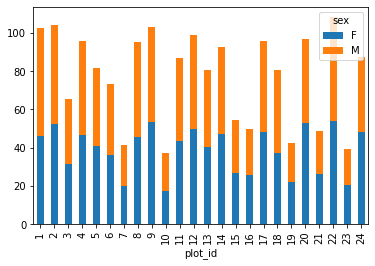

In [80]:
#Create a stacked bar plot of average weight by plot with male vs female values stacked for each plot.
df_gender_weighted.groupby(['plot_id','sex'])['weight'].mean().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='plot_id'>

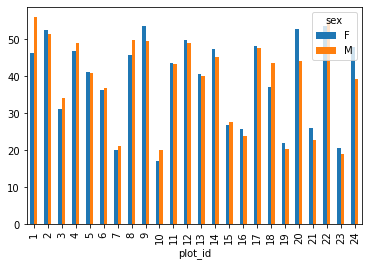

In [81]:
#Create a stacked bar plot of average weight by plot with male vs female values stacked for each plot.
df_gender_weighted.groupby(['plot_id','sex'])['weight'].mean().unstack().plot(kind='bar')